In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

class readFile:
    def __init__(self, filename):
        # Initialize variables to store loaded data
        self.Nx = None
        self.xmax = None
        self.total_time = None
        self.store_steps = None
        self.psi_norm = None
        
        # Load arrays and parameters from the text file
        with open(filename, 'r') as f:
            lines = f.readlines()
            
            # Read parameters
            self.Nx = int(lines[0].split(": ")[1])
            self.xmax = float(lines[1].split(": ")[1].strip())
            self.total_time = float(lines[2].split(": ")[1].strip())
            self.store_steps = int(lines[3].split(": ")[1].strip())
            
            # Read the shape of the 3D array
            array3d_shape = tuple(map(int, lines[4].split(": ")[1].strip().strip('()').split(',')))
            #array3d_shape = (401,1064,1064)
            
            # Read arrays
            array1_start = lines.index("psi_norm:\n") + 1
            psi_norm = np.loadtxt(lines[array1_start:], delimiter=',')
            self.psi_norm = psi_norm.reshape(array3d_shape)
rd_l = readFile('2D_l=1.txt')
rd_lithium = readFile('2D_l=3.txt')
rd_sodium = readFile('2D_l=6.txt')




C:\Users\Celanie Erwan\AppData\Local\Temp\ipykernel_11064\136890160.py:68: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c =  ax.contourf(zz/Z_norm, tt/unit, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)


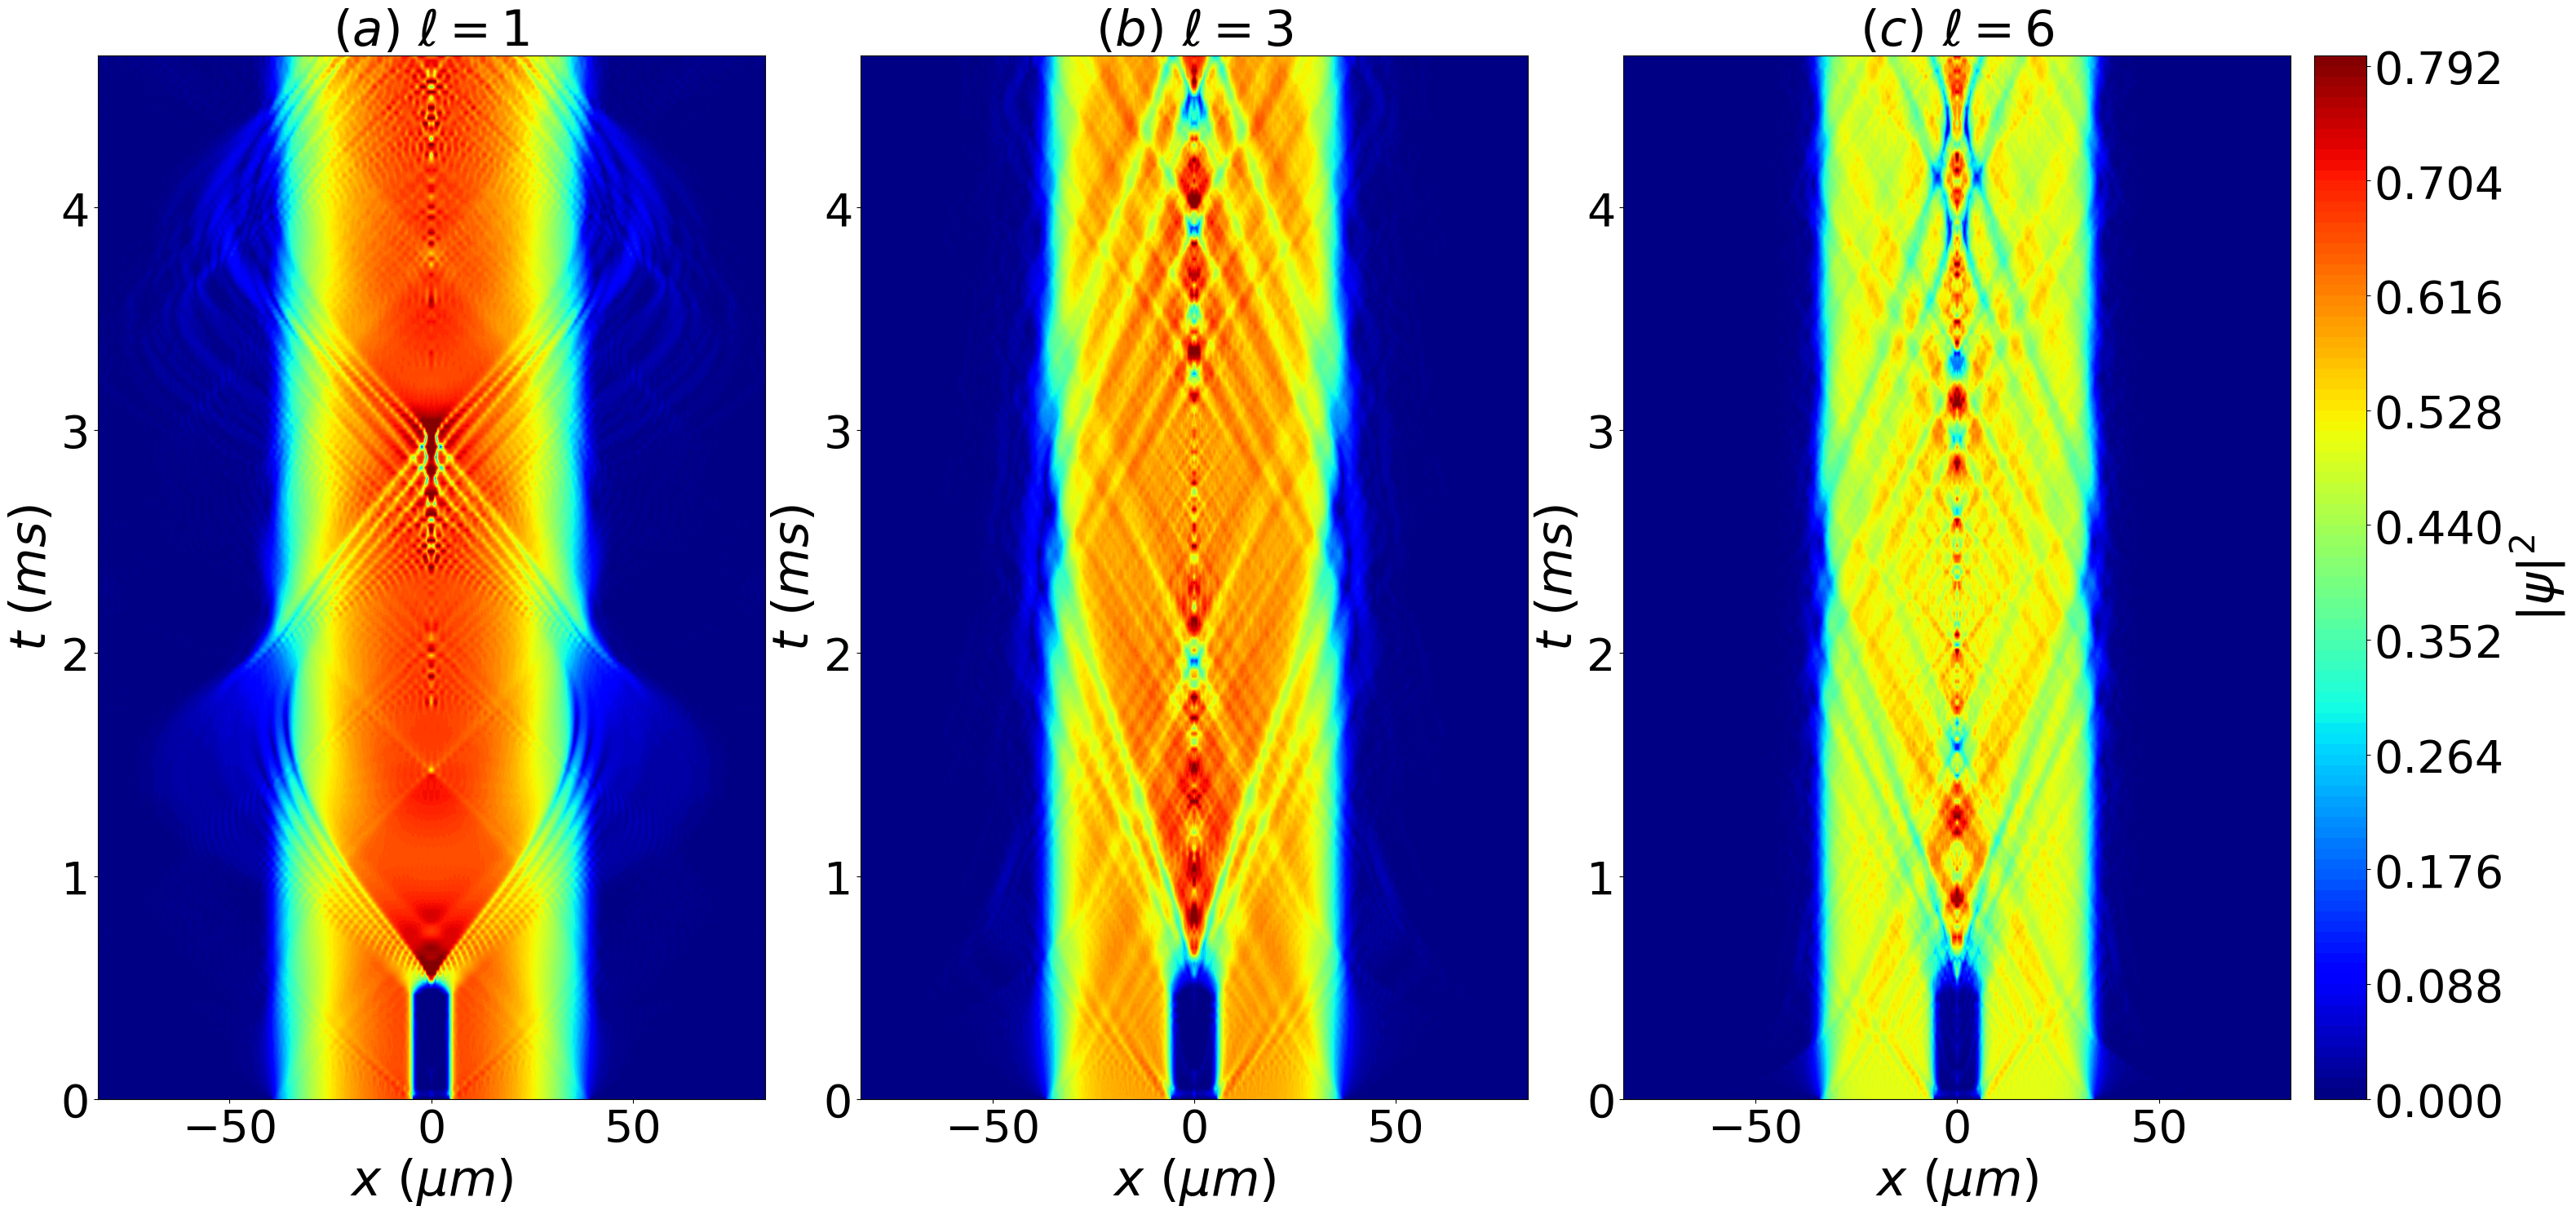

In [5]:
font = 44
subfont = 40
from matplotlib.ticker import FuncFormatter
def plot(rd, ax, t = 0, L_norm=1, Z_norm=1, unit=1, time="ms", fixmaximum=0,n=0):
    plt.style.use("default")
    x = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    y = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    x,y = np.meshgrid(x,y)


    # Makes the contour plot:
    index = int((rd.store_steps)/rd.total_time*t)
    toplot=rd.psi_norm[index]    
    from matplotlib import cm
    cont = ax.contourf(x/L_norm, y/L_norm, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
    cbar = plt.colorbar(cont,ax=ax)
    #ax.set_xlabel("$x\ (mm)$",fontsize = font)               # choose axes labels
    #ax.set_ylabel("$y\ (mm)$",fontsize = font)
    if n == 1 or n==3:
        cbar.set_label('$|\psi|^2$',fontsize = font)
    ax.tick_params(axis='both', which='major', labelsize=subfont)  # Increase tick label size
    cbar.ax.tick_params(labelsize=subfont)
        # Define a function to format the colorbar ticks
    def format_func(value, tick_number):
        return f'{value:.1f}'  # Adjust the number of decimal places here
    
    formatter = FuncFormatter(format_func)
    cbar.ax.yaxis.set_major_formatter(formatter)


def final_plot2(self, ax, L_norm=1, Z_norm=1, unit=1, time="ms", fixmaximum=0):
    plt.style.use("default")
    total_time = self.total_time
    tvec = np.linspace(0, total_time, self.store_steps + 1)
    x = np.linspace(-self.xmax/2, self.xmax/2, self.Nx)
    tt, xx = np.meshgrid(tvec, x)

    toplot = np.abs(self.psi_norm)**2
    if fixmaximum > 0:
        toplot[toplot > fixmaximum] = fixmaximum

    cont = ax.contourf(xx / L_norm, tt / unit, toplot.T, 100, cmap=cm.jet, linewidth=0, antialiased=False)
    ax.set_xlabel('$z\ (\mu m)$', fontsize=44)  # axes labels, title, plot and axes range
    ax.set_ylabel('$t\ (ms)$', fontsize=44)
    ax.tick_params(axis='both', which='major', labelsize=40)  # Increase tick label size
    return 

def final_plot_x(rd,ax,L_norm = 1, Z_norm = 1,unit = 1, figsize=(15, 15),time="ms",fixmaximum = 0):
    
    from mpl_toolkits.mplot3d import Axes3D
    
    x = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    y = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    xx,yy=np.meshgrid(x,y)
    z = xx[0,:]
    total_time = rd.total_time
    tvec=np.linspace(0,total_time,rd.store_steps+1)
    tt,zz=np.meshgrid(tvec,z)
    # Generates the plot
    mid = int(rd.Nx / 2) - 1
    toplot= rd.psi_norm[:,mid,:]
    toplot = toplot.T

    if fixmaximum>0:
        toplot[toplot>fixmaximum]=fixmaximum
    
    from matplotlib import cm
    c =  ax.contourf(zz/Z_norm, tt/unit, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
    L = rd.xmax/2/L_norm
    N = rd.Nx
    #cbar = plt.colorbar(c,ax=ax)
    ax.set_xlabel('$x\ (\mu m)$',fontsize = font)               # choose axes labels, title of the plot and axes range
    ax.set_ylabel('$t\ (ms)$',fontsize = font)
    ax.tick_params(axis='both', which='major', labelsize=subfont)  # Increase tick label size
    #cbar.set_label('$|\psi(x,y=0,t)|^2$',fontsize=14)
    return c

hbar = 1.054571596e-34
uaumass = 1.66053873e-27
mass=86.909  # Atoms mass Cs 132.905 , Rb 86.909 (united atomic unit of mass)
mass  = mass * uaumass
Ntot= 20e4
omega_rho = 2*np.pi*160
omega_z = 2*np.pi*6.8
z_t = np.sqrt(hbar/mass/omega_z) # 3e-6 meters

plt.style.use("default")


# Create subplots

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
yeet = 0.8

cont_lithium = final_plot_x(rd_l,axs[0],  1e-6,Z_norm =1e-6,unit = 1e-3,fixmaximum = yeet)
axs[0].set_title('$(a)\ \ell = 1$', fontsize=font)

# Lithium

cont_lithium = final_plot_x(rd_lithium,axs[1],  1e-6,Z_norm =1e-6,unit = 1e-3,fixmaximum = yeet)
axs[1].set_title('$(b)\ \ell = 3$', fontsize=font)

# Sodium
mass_sodium = 22.9 * uaumass  # Sodium
r_t_sodium = np.sqrt(hbar / mass_sodium / omega_rho)  # 3e-6 meters


cont_sodium = final_plot_x(rd_sodium,axs[2],  1e-6,Z_norm =  1e-6,unit = 1e-3,fixmaximum = yeet)
axs[2].set_title('$(c)\ \ell = 6$', fontsize=font)



# Adjust layout
plt.tight_layout()

# Add a single colorbar for all subplots
cbar = fig.colorbar(cont_sodium, ax=axs, orientation='vertical', fraction=0.05, pad=0.01)
cbar.set_label('$|\psi|^2$', fontsize=font)
cbar.ax.tick_params(labelsize=subfont)  # Increase colorbar tick label size

# Display the plot
plt.show()